In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
# URL to dataset
dataUrl = 'https://raw.githubusercontent.com/kug3lblitz/Heat-Replay/master/src/data/final/final.csv'

# Load the dataset
df = pd.read_csv(dataUrl)

# Check head
df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,creativity,syllables,most_used_term,most_used_freq,curses,total_curses,reading_score,charted
0,1961,1960,36,72,65,158,0.500000,70,rose,7,0,0,2.367848,0
1,1961,1960,45,91,74,197,0.494505,81,name,6,0,0,2.771777,1
2,1961,1960,56,106,88,223,0.528302,98,babi,10,0,0,3.885650,1
3,1961,1960,42,148,66,263,0.283784,76,love,24,0,0,2.889886,1
4,1961,1960,29,132,60,354,0.219697,57,come,38,0,0,2.940000,1


In [3]:
# Basic descriptions of the distribution of the data
df.describe()

,year,decade,unique_words,density,unique_words_raw,density_raw,creativity,syllables,most_used_freq,curses,total_curses,reading_score,charted
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,1991.199795,1986.552254,61.605533,137.732582,93.791496,292.182889,0.483824,105.648822,15.484631,0.175461,1.178023,4.881800,0.580943
std,13.556839,13.559383,35.733163,80.929628,45.511645,168.326983,0.163836,56.066287,13.714888,0.380410,4.894722,3.530321,0.493468
min,1961.000000,1960.000000,1.000000,1.000000,2.000000,2.000000,0.057692,3.000000,1.000000,0.000000,0.000000,-3.427959,0.000000
25%,1981.000000,1980.000000,40.000000,84.000000,67.000000,181.000000,0.369702,72.000000,7.000000,0.000000,0.000000,2.980193,0.000000
50%,1994.000000,1990.000000,53.000000,118.000000,85.000000,256.000000,0.462225,93.000000,12.000000,0.000000,0.000000,4.164043,1.000000
75%,2003.000000,2000.000000,70.000000,166.000000,108.000000,355.000000,0.582535,121.000000,19.000000,0.000000,0.000000,5.760301,1.000000
max,2010.000000,2010.000000,311.000000,647.000000,388.000000,1415.000000,1.000000,481.000000,234.000000,1.000000,88.000000,84.237399,1.000000


In [4]:
# Check the types
df.dtypes

year                  int64
decade                int64
unique_words          int64
density               int64
unique_words_raw      int64
density_raw           int64
creativity          float64
syllables             int64
most_used_term       object
most_used_freq        int64
curses                int64
total_curses          int64
reading_score       float64
charted               int64
dtype: object

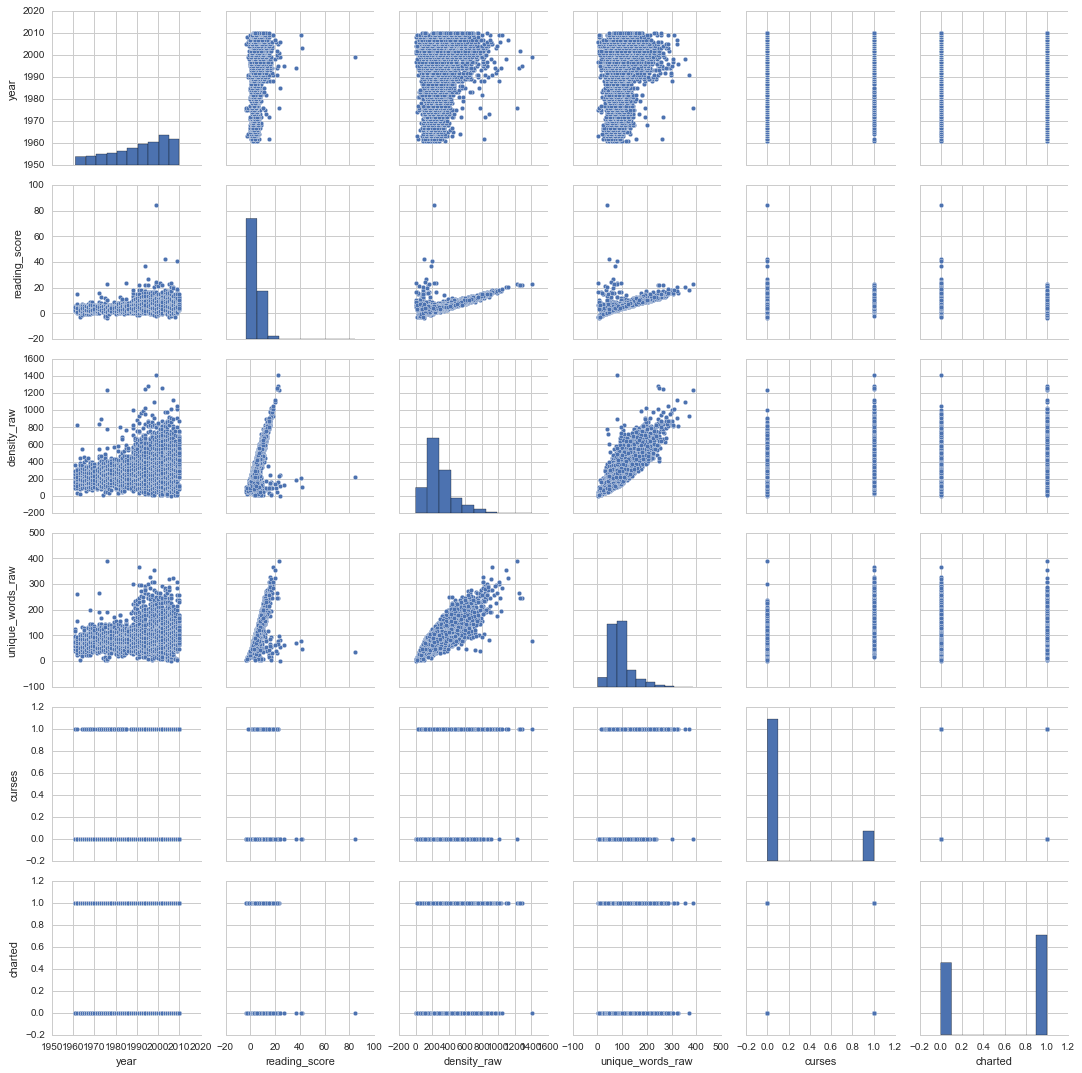

In [5]:
# Get pair plot for major features of the dataset
sns.pairplot(
    df[['year', 'reading_score', 'density_raw', 'unique_words_raw', 'curses', 'charted']]
)

In [6]:
# Analyze unnormalized and normalized charted by reading_score

# Get group by counts for unnormalized charted by curses
df_by_score_unnorm = pd.DataFrame()

df_by_score_unnorm['below 3rd grade'] = \
    df[df['reading_score']<3]['charted'].value_counts()
df_by_score_unnorm['above 3rd grade'] = \
    df[df['reading_score']>=3]['charted'].value_counts()

In [7]:
# Get group by counts for normalized charted by reading_score
df_by_score_normed = pd.DataFrame()

df_by_score_normed['below 3rd grade'] = \
    df[df['reading_score']<3]['charted'].value_counts(normalize=True)
df_by_score_normed['above 3rd grade'] = \
    df[df['reading_score']>=3]['charted'].value_counts(normalize=True)

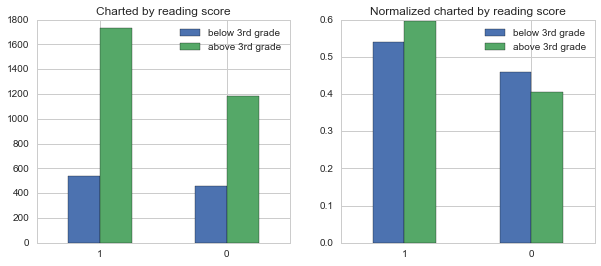

In [8]:
# Plot unnormalized and normalized charted by reading score
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
df_by_score_unnorm.plot(ax=ax1, kind='bar', rot=0, title="Charted by reading score")

ax2 = fig.add_subplot(122)
df_by_score_normed.plot(ax=ax2, kind='bar', rot=0, title="Normalized charted by reading score")

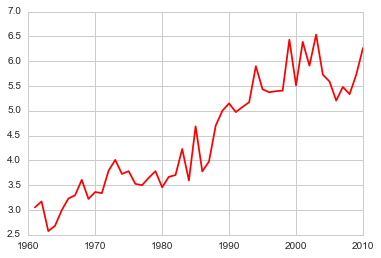

In [9]:
# Quick time series of the unnormalized reading score data points

year = set(df['year'])

# Plot the mean of the reading scores
x, y = zip(
    *sorted(
        (
            xVal, np.mean(
                [
                    yVal for av, yVal in zip(
                        df['year'], df['reading_score']
                    ) if xVal==av
                ]
            )
        ) for xVal in year
    )
)

plt.plot(x, y, 'r-')